In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# mnist dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

from dataset_tools import MNIST
from plotting import plot_image_comparison, loss_plots, plot_random_images


cuda = torch.cuda.is_available()
print(cuda)

True


# Data

In [2]:
flatten = lambda x: ToTensor()(x).view(-1)

# data_train = MNIST(train=True, transform=ToTensor())
# data_test = MNIST(train=False, transform=ToTensor())
data_train = MNIST(train=True, transform=flatten)
data_test = MNIST(train=False, transform=flatten)

train_loader = DataLoader(data_train, batch_size=64, shuffle=True, pin_memory=cuda)
test_loader = DataLoader(data_test, batch_size=64, shuffle=True, pin_memory=cuda)




In [3]:
# test how a sample looks
x, y = next(iter(train_loader))
print(x.shape, y.shape)

torch.Size([64, 784]) torch.Size([64])


# Autoencoder

In [4]:
from models import AutoEncoder

model = AutoEncoder()
print(model)

if cuda:
    model = model.cuda()

optimizer = optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()


AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): LeakyReLU(negative_slope=0.01)
    (5): Linear(in_features=128, out_features=64, bias=True)
    (6): LeakyReLU(negative_slope=0.01)
    (7): Linear(in_features=64, out_features=12, bias=True)
    (8): LeakyReLU(negative_slope=0.01)
    (9): Linear(in_features=12, out_features=3, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=12, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=12, out_features=64, bias=True)
    (4): LeakyReLU(negative_slope=0.01)
    (5): Linear(in_features=64, out_features=128, bias=True)
    (6): LeakyReLU(negative_slope=0.01)
    (7): Linear(in_features=128, out_features=256, bias=True)
    (8): LeakyReLU(negative_s

In [5]:
# test forward pass
x, y = next(iter(train_loader))
print("x.shape:", x.shape)

if cuda:
    x = x.cuda()

output = model(x)

print("output.shape:", output.shape)

x.shape: torch.Size([64, 784])
output.shape: torch.Size([64, 784])


## Training

In [6]:
num_epochs = 1

train_loss = []
valid_loss = []

for epoch in range(num_epochs):
    batch_loss = []
    model.train()

    for x, y in train_loader:
        if cuda:
            x = x.cuda()
        optimizer.zero_grad()
        output = model(x)
        loss = loss_fn(output, x)
        loss.backward()
        optimizer.step()
        batch_loss.append(loss.item())

    train_loss.append(np.mean(batch_loss))

    print(f"Epoch {epoch+1}, loss: {np.mean(batch_loss)}")




Epoch 1, loss: 0.05702828705660316


output.shape: torch.Size([64, 784])


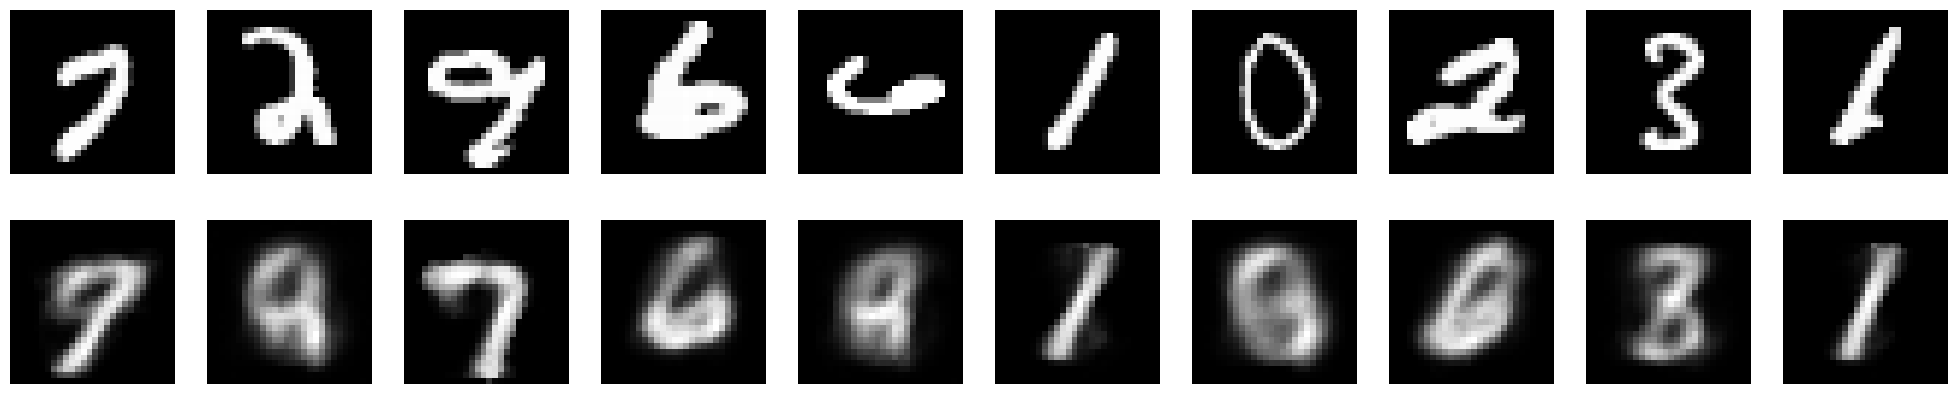

In [7]:
# test the model
model.eval()

images, labels = next(iter(test_loader))
if cuda:
    images = images.cuda()
output = model(images)

print("output.shape:", output.shape)

# plot the original and reconstructed images
plot_image_comparison(model, test_loader, cuda)


